In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file=pd.read_csv('C:/Users/gehna/Data Science/Projects/prices-split-adjusted.csv')

In [3]:
file

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


# Cleaning data

In [4]:
df=file.drop(columns=['date'])
features=file[['open','low','high','volume']]
target=file['close']

In [5]:
file.shape

(851264, 7)

In [6]:
target.shape

(851264,)

In [7]:
features.shape

(851264, 4)

In [8]:
u=np.mean(features, axis=0)
std=np.std(features, axis=0)

In [9]:
u.shape

(4,)

In [28]:
std

open      7.520385e+01
low       7.445947e+01
high      7.590682e+01
volume    1.249467e+07
dtype: float64

In [11]:
features=(features-u)/std

In [12]:
ones=np.ones((features.shape[0],1))

In [13]:
features=np.hstack((ones,features))

In [14]:
features.shape

(851264, 5)

# Training Data

In [15]:
split=0.8
x_train=features[:int(features.shape[0]*split),:]
y_train=target[:int(target.shape[0]*split)]

x_test=features[int(features.shape[0]*split):,:]
y_test=target[int(target.shape[0]*split):]

In [16]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((681011, 5), (170253, 5), (681011,), (170253,))

In [17]:
def hypothesis(x,weights):
    return np.dot(x,weights)

In [18]:
def loss_function(x,y,weights):
    pred=hypothesis(x,weights)
    loss=np.sum((pred-y)**2)
    return loss/x.shape[0]

In [19]:
def gradient(x,y,weights):
    pred=hypothesis(x,weights)
    grad=np.dot((pred-y),x)
    return grad/x.shape[0]

In [20]:
def gradient_descent(x,y):
    weights=np.zeros((x.shape[1],))
    epochs=1000
    lr_rate=0.03
    list_loss=[]
    
    for i in range (epochs):
        grad=gradient(x,y,weights)
        list_loss.append(loss_function(x,y,weights))
        print(f'On:{i}',end='\r')
        weights=weights-(lr_rate*grad)
    return weights,list_loss

In [21]:
weights,list_loss=gradient_descent(x_train,y_train)

In [22]:
list_loss[-1]

0.6582032878509975

# Loss Visualization 

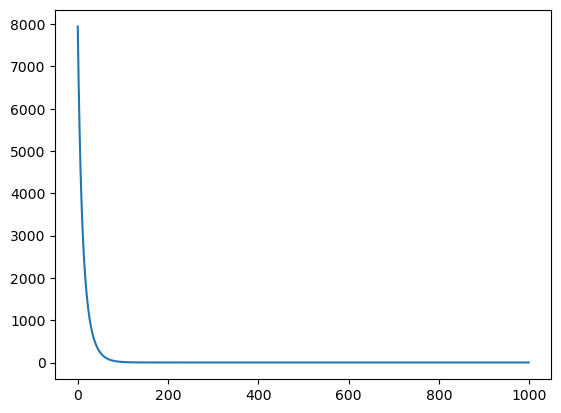

In [24]:
plt.plot(list_loss)

In [25]:
from sklearn import metrics

In [26]:
pred=[]
for i in range(x_test.shape[0]):
    pred.append(hypothesis(x_test[i],weights))

# To check the errors in train model

In [27]:
print("MAE",metrics.mean_absolute_error(y_test,pred))
print("MSE",metrics.mean_absolute_error(y_test,pred))
print("RMSE",metrics.mean_squared_error(y_test,pred)**0.5)

MAE 0.5760518426578511
MSE 0.5760518426578511
RMSE 1.1786371138497724
